<small>*Notebook auto-generated from [``altair/examples/json/trellis_barley.vl.json``](../../altair/examples/json/trellis_barley.vl.json)*</small>

# Altair Example: Trellis Barley

The Trellis display by Becker et al. helped establish small multiples as a “powerful mechanism for understanding interactions in studies of how a response depends on explanatory variables”. Here we reproduce a trellis of Barley yields from the 1930s, complete with main-effects ordering to facilitate comparison.



In [1]:
# Uncomment and run these two lines to enable rendering in JupyterLab/nteract
# from altair import enable_mime_rendering
# enable_mime_rendering()

## Load Dataset
The data comes in the form of a Pandas Dataframe:

In [2]:
from altair import load_dataset
data = load_dataset("barley")
data.head()

,site,variety,year,yield
0,University Farm,Manchuria,1931,27.00000
1,Waseca,Manchuria,1931,48.86667
2,Morris,Manchuria,1931,27.43334
3,Crookston,Manchuria,1931,39.93333
4,Grand Rapids,Manchuria,1931,32.96667


## Define Altair Specification

In [3]:
from altair import *  # Import the altair API

chart = Chart(data).mark_point().encode(
    color='year:N',
    row='site:O',
    x='mean(yield):Q',
    y=Y('variety:O',
        scale=Scale(
            bandSize=12.0,
        ),
        sort=SortField(
            field='yield',
            op='mean',
        ),
    ),
)

chart.max_rows = len(data)  # Altair 1.2.1 has a max_rows of 500 by default

IPython rich display will invoke Vega-Lite:

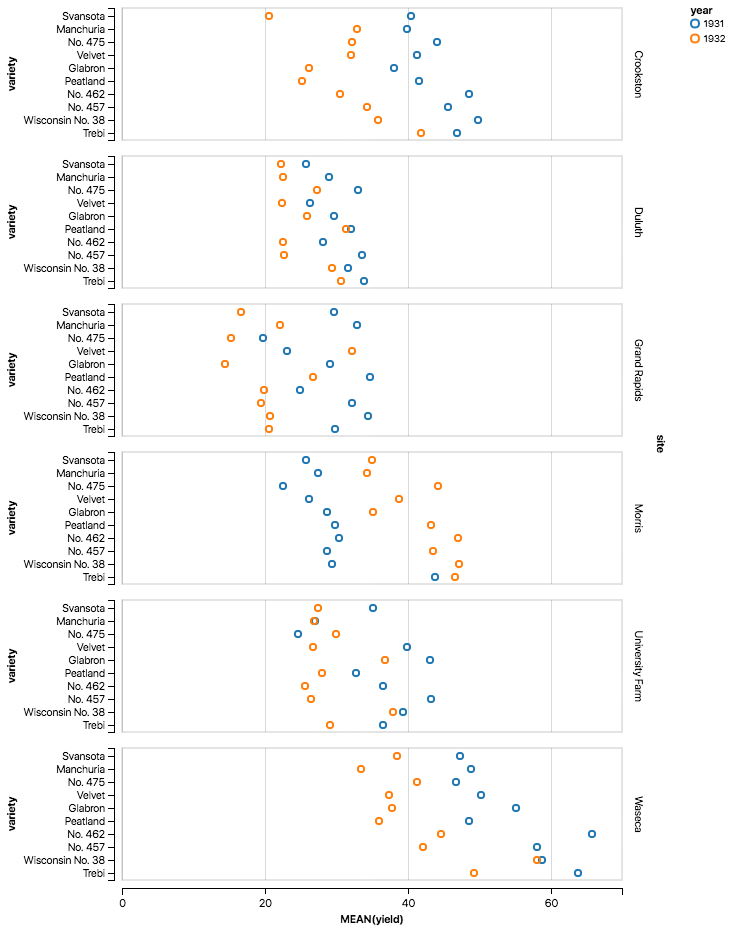

In [4]:
chart

## Output Vega-Lite Specification

Generate JSON dict, leaving data out:

In [5]:
chart.to_dict(data=False)

{'$schema': 'https://vega.github.io/schema/vega-lite/v1.2.1.json',
 'encoding': {'color': {'field': 'year', 'type': 'nominal'},
  'row': {'field': 'site', 'type': 'ordinal'},
  'x': {'aggregate': 'mean', 'field': 'yield', 'type': 'quantitative'},
  'y': {'field': 'variety',
   'scale': {'bandSize': 12.0},
   'sort': {'field': 'yield', 'op': 'mean'},
   'type': 'ordinal'}},
 'mark': 'point'}